In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.chdir('C:\\Users\\harik\\A-predictive-model-for-forecasting-demand-and-supply-information-of-TOP-crops-main')

In [4]:
os.chdir('C:\\Users\\harik\\OneDrive\\Desktop\\A-predictive-model-for-forecasting-demand-and-supply-information-of-TOP-crops-main\\A-predictive-model-for-forecasting-demand-and-supply-information-of-TOP-crops-main')

In [5]:
df = pd.read_csv("crops.csv")

In [6]:
df.head()

,Temperature,Rainfall,Humidity,Moisture,Crop
0,23,221,79,397,Rice
1,16,86,85,625,Tomato
2,23,68,51,421,Wheat
3,15,47,62,422,Barley
4,26,91,32,367,chile


In [7]:
df.describe()

,Temperature,Rainfall,Humidity,Moisture
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,19.757000,115.32190,61.495700,427.205800
std,5.118454,81.60272,16.511204,73.558212
min,5.000000,30.00000,30.000000,300.000000
25%,16.000000,50.00000,52.000000,390.000000
50%,21.000000,91.00000,63.000000,412.000000
75%,24.000000,129.00000,75.000000,437.000000
max,27.000000,350.00000,90.000000,650.000000


<AxesSubplot:>

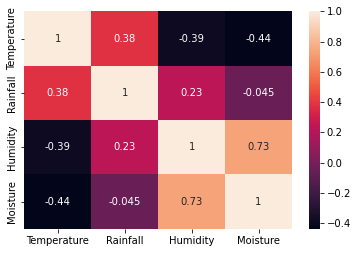

In [8]:
sns.heatmap(df[["Temperature","Rainfall","Humidity","Moisture"]].corr(),annot=True)


C:\Users\harik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

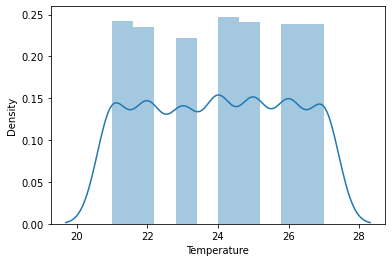

In [9]:
sns.distplot(df["Temperature"][(df["Crop"]=="Rice")])


C:\Users\harik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

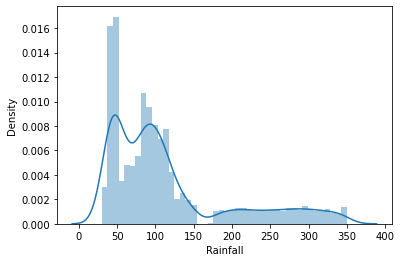

In [10]:
sns.distplot(df["Rainfall"])


<AxesSubplot:xlabel='Moisture', ylabel='Crop'>

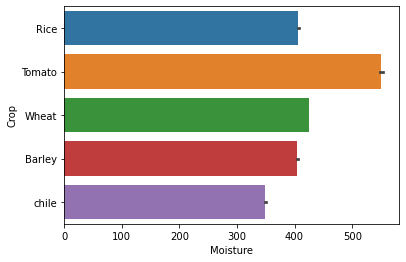

In [11]:
sns.barplot(x = "Moisture", y = "Crop",data = df)


In [12]:
sns.pairplot(df, hue = 'Crop', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

SyntaxError: invalid syntax (3056714192.py, line 3)

In [13]:
sns.pairplot(df, hue = 'Crop', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

SyntaxError: invalid syntax (3056714192.py, line 3)

C:\Users\harik\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


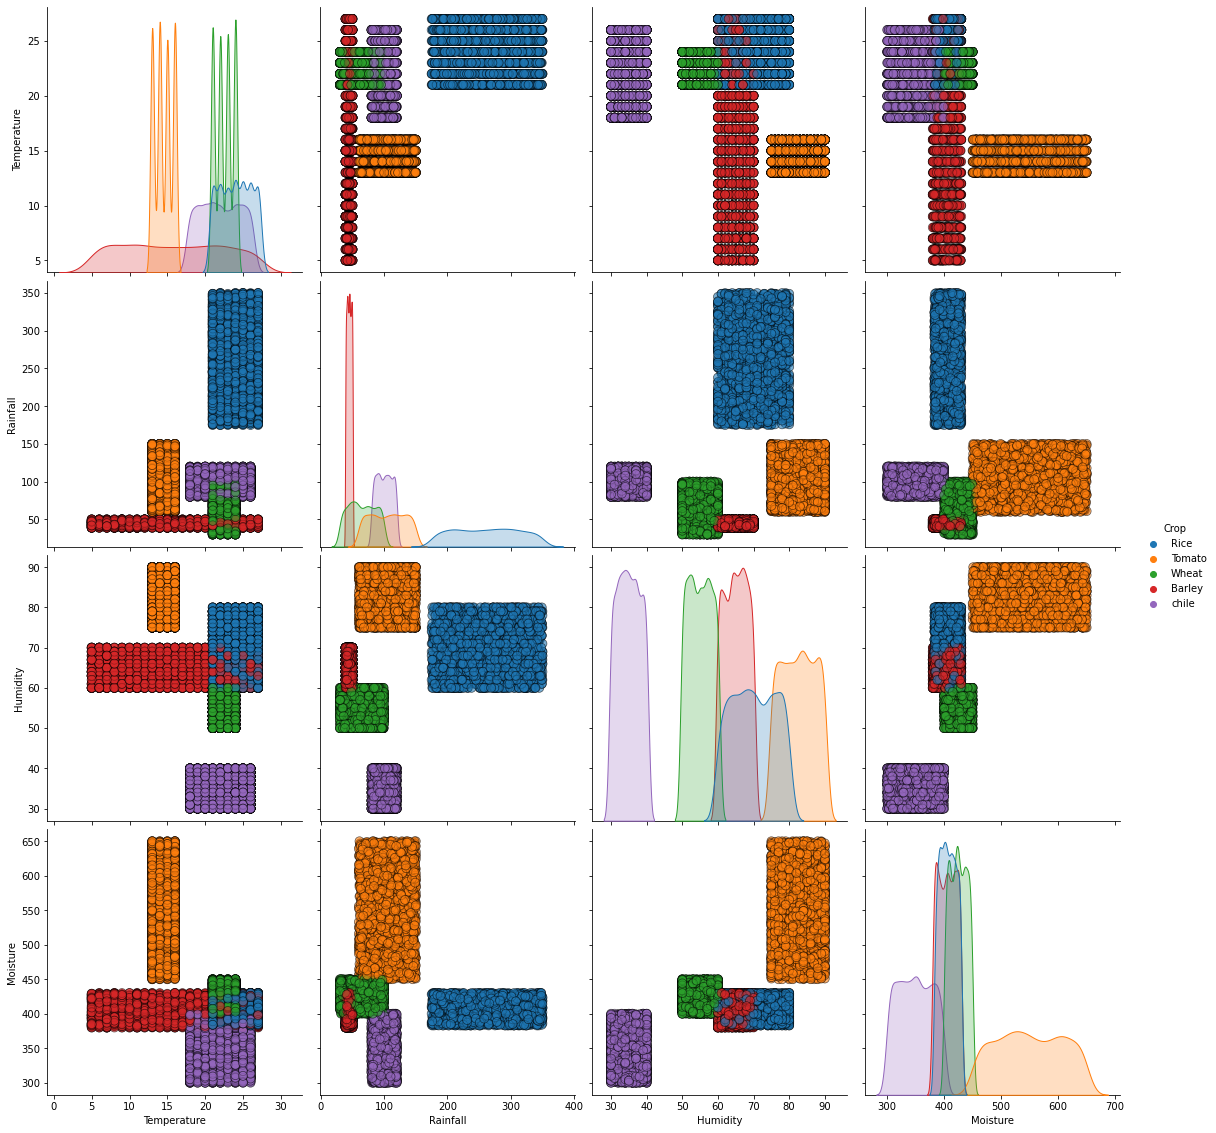

In [14]:
sns.pairplot(df, hue = 'Crop', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

In [15]:
cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
log_fit = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(pred)

C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['chile' 'Rice' 'Barley' ... 'Wheat' 'Barley' 'chile']


C:\Users\harik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracy = clf.score(X_test,y_test)
print(accuracy*100)

96.24242424242424


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred,labels = ["Rice","Wheat","Barley","Tomato","Chile"])


array([[673,   0,   0,   0,   0],
       [  0, 637,  21,   1,   0],
       [  0,  17, 615,  34,   0],
       [  0,   1,  49, 604,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [20]:
prob_pred = clf.predict_proba(X_test)
print(prob_pred)

[[2.17182680e-018 2.16319358e-061 2.68530737e-010 1.20537386e-003
  9.98794626e-001]
 [4.19982715e-171 1.00000000e+000 1.38588332e-138 6.96949901e-142
  8.03964661e-118]
 [7.93475367e-001 1.20130332e-157 2.06524610e-001 2.31866845e-008
  6.77157427e-023]
 ...
 [3.04854241e-009 5.42085815e-102 2.99296534e-003 9.96981332e-001
  2.56993335e-005]
 [9.62569510e-001 3.49538114e-149 3.74299558e-002 5.33997785e-007
  5.61468826e-022]
 [2.39790584e-019 5.60479694e-057 1.34158229e-010 5.71328956e-004
  9.99428671e-001]]


In [21]:
classes = clf.classes_ 
print(classes)

['Barley' 'Rice' 'Tomato' 'Wheat' 'chile']


In [22]:
values = [[int(x) for x in input("Enter the Tempertature,Rainfall,Humidity,Moisture in order: ").split()]]


Enter the Tempertature,Rainfall,Humidity,Moisture in order: 30 70 300 400


In [23]:
lr_proba_predict = clf.predict_proba(values)
print(lr_proba_predict)

[[1.00000000e+000 3.32975279e-191 7.94172401e-033 6.26432639e-132
  8.08517001e-226]]


In [24]:
df_pred = pd.DataFrame(data = prob_pred, columns = ['Barley', 'Rice', 'Tomato', 'Wheat', 'Chile'])
df_pred.head()

,Barley,Rice,Tomato,Wheat,Chile
0,2.171827e-18,2.163194e-61,2.685307e-10,1.205374e-03,9.987946e-01
1,4.199827e-171,1.000000e+00,1.385883e-138,6.969499e-142,8.039647e-118
2,7.934754e-01,1.201303e-157,2.065246e-01,2.318668e-08,6.771574e-23
3,1.740352e-144,1.000000e+00,3.236000e-117,3.355109e-125,6.328006e-109
4,3.051006e-23,8.627828e-55,3.874744e-14,9.598134e-06,9.999904e-01


In [25]:
clf.coef_

array([[-0.38648776, -0.91781279,  0.91564269,  0.16920055],
       [ 0.0337976 ,  2.31801425,  0.10149251, -0.91432681],
       [-0.62060832, -0.56850081,  0.59335714,  0.18285641],
       [ 0.46822901, -0.60946506, -0.39601559,  0.27972214],
       [ 0.50506947, -0.22223559, -1.21447675,  0.28254772]])

In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
kfold = StratifiedKFold(n_splits=10)
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\Users\harik\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.9986567164179105

In [28]:
rfc_prob = gsRFC.predict_proba(values)
print(rfc_prob)


[[0.45333333 0.16333333 0.10333333 0.25977778 0.02022222]]


In [29]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01],
                  'C': [1, 10, 50]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9985074626865671

In [30]:
svm_prob = gsSVMC.predict_proba(values)


In [31]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.01, 0.1, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
ada_prob = gsadaDTC.predict_proba(values)

In [33]:
print(gsadaDTC.best_score_ * 100)


99.77611940298509


[0.16251283 0.28355833 0.32575362 0.22817523]


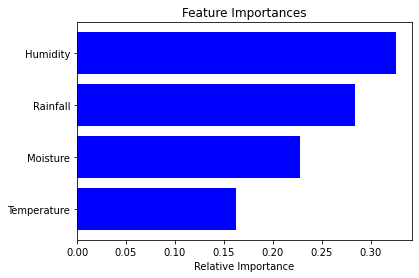

In [34]:
features = ['Temperature','Rainfall','Humidity','Moisture']
importances = RFC_best.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[0.00360385 0.20203895 0.54482058 0.24953663]


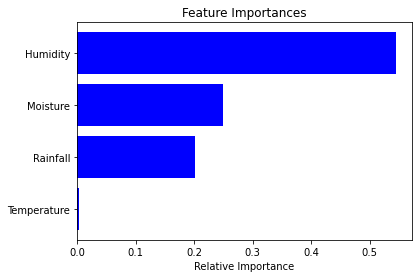

In [35]:
features = ['Temperature','Rainfall','Humidity','Moisture']
importances = ada_best.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
from sklearn.neural_network import MLPClassifier


In [37]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(13,13,13), random_state=1)


In [38]:
clf.fit(X_train,y_train)


C:\Users\harik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\harik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 13, 13), random_state=1,
              solver='lbfgs')

In [39]:
clf.predict(X_test)


array(['chile', 'Rice', 'Barley', ..., 'Wheat', 'Barley', 'chile'],
      dtype='<U6')

In [40]:
acc = clf.score(X_test,y_test)
print(acc*100)

97.69696969696969


In [41]:
ann_prob = clf.predict_proba(values)


In [42]:
final_prob = (lr_proba_predict + rfc_prob + svm_prob + ada_prob + ann_prob)/5
print(final_prob)

[[0.32907179 0.28830933 0.21811714 0.10355926 0.06094247]]


In [43]:
probabilities = np.ravel(final_prob)
d = {k:v for k,v in zip(classes,probabilities)}
print(d)

{'Barley': 0.32907179190346636, 'Rice': 0.2883093315585131, 'Tomato': 0.21811714163905327, 'Wheat': 0.10355926392066479, 'chile': 0.06094247097830243}


In [44]:
from operator import itemgetter
sort = sorted(d.items(), key=itemgetter(1),reverse = True)
crop = []
prob = []
for i,v in sort:
    crop.append(i.lower())
    prob.append(v)
final_d = {k:v for k,v in zip(crop,prob)}
print(final_d)

{'barley': 0.32907179190346636, 'rice': 0.2883093315585131, 'tomato': 0.21811714163905327, 'wheat': 0.10355926392066479, 'chile': 0.06094247097830243}


In [45]:
required = input("Enter the crop which you want to supply: ").lower()
if required == crop[0]:
    print(required+" crop can be grown")
elif required in crop[:3]:
    print("You can grown "+required+" crop. But it is preferred to grow "+crop[0])
elif required in crop[3:5]:
    print("Cannot grow "+required+" crop")
else:
    print("No such crop exists")

Enter the crop which you want to supply: Rice
You can grown rice crop. But it is preferred to grow barley
